<h3 align="center"><FONT size="7pt">ARTHENA - Data Challenge</FONT></h3>
<br><h3 align="center"><FONT size="5pt">Pierre-Charles Paret-Van Wolput</FONT></h3></br>

### Import and setting part

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Disable warnings on Ipython
import warnings
warnings.filterwarnings('ignore')

#Import random to set the seed
import random

In [198]:
seed = 10

In [248]:
df = pd.read_csv("data.csv", encoding="latin-1")

In [249]:
print(df)

        artist_birth_year  artist_death_year  artist_name artist_nationality  \
0                    1902             1982.0  Wifredo Lam              Cuban   
1                    1902             1982.0  Wifredo Lam              Cuban   
2                    1902             1982.0  Wifredo Lam              Cuban   
3                    1902             1982.0  Wifredo Lam              Cuban   
4                    1902             1982.0  Wifredo Lam              Cuban   
5                    1902             1982.0  Wifredo Lam              Cuban   
6                    1902             1982.0  Wifredo Lam              Cuban   
7                    1902             1982.0  Wifredo Lam              Cuban   
8                    1902             1982.0  Wifredo Lam              Cuban   
9                    1902             1982.0  Wifredo Lam              Cuban   
10                   1902             1982.0  Wifredo Lam              Cuban   
11                   1902             19

In [250]:
df.count()

artist_birth_year        107578
artist_death_year         71186
artist_name              107578
artist_nationality       107578
auction_date             107578
category                 107578
currency                 107578
edition                   13376
estimate_high             68404
estimate_low              68409
hammer_price             101254
location                  89733
materials                105739
measurement_depth_cm     107578
measurement_height_cm    107578
measurement_width_cm     107578
title                    107118
year_of_execution         79818
dtype: int64

I got some understanding of the data before starting the work.

### Predicting Hammer Price

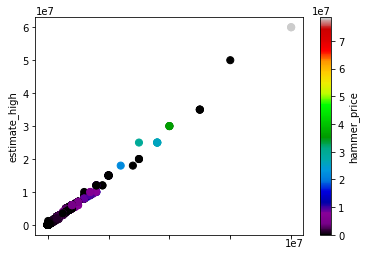

In [117]:
df.plot(kind='scatter', x='estimate_low', y='estimate_high', c='hammer_price', s=50, colormap=plt.cm.spectral);

I wanted to check how the range price predictors did at predicting the price.

## Training a predictive model on numerical features

We keep only numerical values at first.

In [118]:
numerical_variables = df.get(['artist_birth_year', 'artist_death_year', 'estimate_high', 'estimate_low', 'auction_date', 'measurement_depth_cm', 'measurement_height_cm', 'measurement_width_cm', 'year_of_execution', 'hammer_price'])

We want to predict hammer_price so the NaNs in hammer_price are not really interesting in the beginning.

In [119]:
numerical_variables_used = numerical_variables[np.isfinite(numerical_variables['hammer_price'])]
numerical_variables_used.count()

artist_birth_year        101254
artist_death_year         68056
estimate_high             62262
estimate_low              62267
auction_date             101254
measurement_depth_cm     101254
measurement_height_cm    101254
measurement_width_cm     101254
year_of_execution         75538
hammer_price             101254
dtype: int64

In [120]:
numerical_variables_used['year_of_execution'] = pd.to_numeric(numerical_variables_used['year_of_execution'], errors='coerce')
numerical_variables_used['auction_date'] = pd.to_datetime(numerical_variables_used['auction_date'])

In [121]:
numerical_variables_used

artist_birth_year  artist_death_year  estimate_high  estimate_low  \
0                    1902             1982.0            NaN           NaN   
1                    1902             1982.0            NaN           NaN   
2                    1902             1982.0            NaN           NaN   
3                    1902             1982.0            NaN           NaN   
4                    1902             1982.0         2500.0        1500.0   
6                    1902             1982.0            NaN           NaN   
7                    1902             1982.0        40000.0       30000.0   
8                    1902             1982.0        12000.0       10000.0   
9                    1902             1982.0            NaN           NaN   
11                   1902             1982.0        22000.0       18000.0   
12                   1902             1982.0        25000.0       20000.0   
13                   1902             1982.0            NaN           NaN   
14                   1902             1982.0            NaN           NaN   
15                   1902             1982.0            NaN           NaN   
16                   1902             1982.0            NaN           NaN   
17                   1902             1982.0            NaN           NaN   
18                   1902             1982.0            NaN           NaN   
19                   1902             1982.0        15000.0       12000.0   
20                   1902             1982.0        35000.0       25000.0   
21                   1902             1982.0            NaN           NaN   
22                   1902             1982.0            NaN           NaN   
23                   1902             1982.0            NaN           NaN   
24                   1902             1982.0            NaN           NaN   
25                   1902             1982.0        21000.0       21000.0   
26                   1902             1982.0            NaN           NaN   
28                   1902             1982.0            NaN           NaN   
29                   1902             1982.0            NaN           NaN   
30                   1902             1982.0            NaN           NaN   
31                   1902             1982.0            NaN           NaN   
32                   1902             1982.0            NaN           NaN   
...                   ...                ...            ...           ...   
107544               1969                NaN        30000.0       20000.0   
107545               1969                NaN        10000.0        8000.0   
107546               1969                NaN         6000.0        4000.0   
107547               1969                NaN         4000.0        3000.0   
107548               1969                NaN         5000.0        5000.0   
107549               1969                NaN        20000.0       15000.0   
107550               1969                NaN         2000.0        1000.0   
107551               1969                NaN        15000.0       10000.0   
107552               1969                NaN        12000.0        8000.0   
107553               1969                NaN        12000.0        8000.0   
107554               1969                NaN        12000.0        8000.0   
107555               1969                NaN         2500.0        1800.0   
107556               1969                NaN         2500.0        1500.0   
107557               1969                NaN          750.0         500.0   
107558               1969                NaN        15000.0       10000.0   
107559               1969                NaN         7000.0        5000.0   
107560               1969                NaN        20000.0       15000.0   
107562               1969                NaN        10000.0        7000.0   
107563               1969                NaN         3000.0        2000.0   
107564               1969                NaN         6000.0        4000.0   
1075

In [122]:
numerical_variables_used_full_finite = numerical_variables_used.dropna()

### Preprocessing on numerical data

In [123]:
from sklearn import preprocessing

In [124]:
labels = numerical_variables_used_full_finite['hammer_price']
features = numerical_variables_used_full_finite.drop(['auction_date','hammer_price'], axis=1)

In [224]:
features

artist_birth_year  artist_death_year  estimate_high  estimate_low  \
7                    1902             1982.0        40000.0       30000.0   
11                   1902             1982.0        22000.0       18000.0   
12                   1902             1982.0        25000.0       20000.0   
19                   1902             1982.0        15000.0       12000.0   
20                   1902             1982.0        35000.0       25000.0   
25                   1902             1982.0        21000.0       21000.0   
41                   1902             1982.0        10000.0        8000.0   
52                   1902             1982.0        20000.0       15000.0   
53                   1902             1982.0         8000.0        6000.0   
61                   1902             1982.0        90000.0       70000.0   
65                   1902             1982.0         5000.0        3000.0   
66                   1902             1982.0       150000.0      100000.0   
83                   1902             1982.0        25000.0       20000.0   
85                   1902             1982.0         9000.0        7000.0   
86                   1902             1982.0         9000.0        7000.0   
93                   1902             1982.0        18000.0       12000.0   
94                   1902             1982.0        20000.0       15000.0   
98                   1902             1982.0         6000.0        5000.0   
100                  1902             1982.0        35000.0       25000.0   
101                  1902             1982.0         8000.0        6000.0   
111                  1902             1982.0       100000.0       80000.0   
116                  1902             1982.0       300000.0      250000.0   
119                  1902             1982.0        12000.0       10000.0   
124                  1902             1982.0        20000.0       15000.0   
126                  1902             1982.0        18000.0       13000.0   
128                  1902             1982.0         9000.0        7000.0   
130                  1902             1982.0        20000.0       16000.0   
134                  1902             1982.0        15000.0       12000.0   
135                  1902             1982.0       200000.0      180000.0   
137                  1902             1982.0       175000.0      125000.0   
...                   ...                ...            ...           ...   
107386               1914             1994.0         1000.0         600.0   
107387               1914             1994.0       150000.0      150000.0   
107388               1914             1994.0         2000.0        1500.0   
107389               1914             1994.0        41973.0          43.0   
107390               1914             1994.0       150000.0      120000.0   
107391               1914             1994.0         1500.0        1200.0   
107392               1914             1994.0        15000.0       12000.0   
107394               1914             1994.0        50000.0       30000.0   
107395               1914             1994.0         3000.0        2500.0   
107398               1914             1994.0        80000.0       60000.0   
107400               1914             1994.0        22000.0       18000.0   
107403               1914             1994.0         1000.0        1000.0   
107404               1914             1994.0        60000.0       40000.0   
107405               1914             1994.0        60000.0       40000.0   
107406               1914             1994.0         2200.0        1400.0   
107407               1914             1994.0         1600.0        1200.0   
107408               1914             1994.0         1400.0        1400.0   
107409               1914             1994.0         1800.0        1600.0   
107410               1914             1994.0         2400.0        1800.0   
107412               1914             1994.0         2200.0        1800.0   
1074

In [125]:
X_scaled = preprocessing.scale(X_train)

In [126]:
from sklearn.cross_validation import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(features , labels , test_size = 0.05)

#### Idea_1: linear regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
reg = LinearRegression()

In [149]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
reg.score(X_test,Y_test)

0.71727791835731736

#### Idea 2 : Random-Forest Regression

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
reg = RandomForestRegressor(random_state = seed)

In [217]:
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [218]:
reg.score(X_test,Y_test)

0.89458307991759767

In [221]:
reg.feature_importances_

array([ 0.07880563,  0.07640032,  0.34278322,  0.40401766,  0.00592091,
        0.03393894,  0.0228492 ,  0.03528412])

It seems the best model so far that I found, but I would have loved to spend more time on cross validations and hyperparameters engineering for the 3 models. 

#### Idea 3: MLP Regression

In [135]:
from sklearn.neural_network import MLPRegressor

In [199]:
reg = MLPRegressor(random_state = seed)

In [200]:
reg.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [201]:
reg.score(X_test, Y_test)

0.74075208962532568

## Answer to questions

In [251]:
df['auction_date'] = pd.to_datetime(numerical_variables_used['auction_date'])

df = df.sort_values('auction_date')

In [269]:
df[df['artist_name']== 'Sol LeWitt'].dropna(axis = 0, subset = {'auction_date'}).tail(110)

artist_birth_year  artist_death_year artist_name artist_nationality  \
34027               1928             2007.0  Sol LeWitt           American   
34389               1928             2007.0  Sol LeWitt           American   
34427               1928             2007.0  Sol LeWitt           American   
34713               1928             2007.0  Sol LeWitt           American   
32859               1928             2007.0  Sol LeWitt           American   
34658               1928             2007.0  Sol LeWitt           American   
33215               1928             2007.0  Sol LeWitt           American   
32795               1928             2007.0  Sol LeWitt           American   
33731               1928             2007.0  Sol LeWitt           American   
33997               1928             2007.0  Sol LeWitt           American   
33420               1928             2007.0  Sol LeWitt           American   
34523               1928             2007.0  Sol LeWitt           American   
33542               1928             2007.0  Sol LeWitt           American   
33713               1928             2007.0  Sol LeWitt           American   
34377               1928             2007.0  Sol LeWitt           American   
34140               1928             2007.0  Sol LeWitt           American   
33959               1928             2007.0  Sol LeWitt           American   
34106               1928             2007.0  Sol LeWitt           American   
32766               1928             2007.0  Sol LeWitt           American   
34127               1928             2007.0  Sol LeWitt           American   
34215               1928             2007.0  Sol LeWitt           American   
34238               1928             2007.0  Sol LeWitt           American   
33113               1928             2007.0  Sol LeWitt           American   
34188               1928             2007.0  Sol LeWitt           American   
32879               1928             2007.0  Sol LeWitt           American   
34437               1928             2007.0  Sol LeWitt           American   
34463               1928             2007.0  Sol LeWitt           American   
32834               1928             2007.0  Sol LeWitt           American   
34680               1928             2007.0  Sol LeWitt           American   
34405               1928             2007.0  Sol LeWitt           American   
...                  ...                ...         ...                ...   
32873               1928             2007.0  Sol LeWitt           American   
34669               1928             2007.0  Sol LeWitt           American   
34079               1928             2007.0  Sol LeWitt           American   
34014               1928             2007.0  Sol LeWitt           American   
34350               1928             2007.0  Sol LeWitt           American   
33818               1928             2007.0  Sol LeWitt           American   
32918               1928             2007.0  Sol LeWitt           American   
33186               1928             2007.0  Sol LeWitt           American   
32806               1928             2007.0  Sol LeWitt           American   
33223               1928             2007.0  Sol LeWitt           American   
33693               1928             2007.0  Sol LeWitt           American   
33560               1928             2007.0  Sol LeWitt           American   
33350               1928             2007.0  Sol LeWitt           American   
33632               1928             2007.0  Sol LeWitt           American   
32927               1928             2007.0  Sol LeWitt           American   
34761               1928             2007.0  Sol LeWitt           American   
34334               1928             2007.0  Sol LeWitt           American   
33749               1928             2007.0  Sol LeWitt           American   
33482               1928             2007.0  Sol LeWitt           American   
33726               1928     

1. The most important features in the model are the estimated low price and estimated high price. This seems very logical since the objective of the two is to give the shortest range in which the hammer price can be.
2. I am using the $R^{2}$ on the test dataset to see how it fits. This means how much of the hammer price is explained by the variables used.
3. I would group artists as categorical variables, eventually scrap the web to see how valuables their artworks are (we have an HTML parser now...) and see if I can add this to a dataframe. For this, doing a webscraping on google using the artist name and the dimensions of the work will give you additionnal and valuable info. Maybe the price is a function of the size for an artist but I doubt it (example: Vermeer, The Mikmaid).
4. Prices dropped during the financial crisis.
5. The society managing the auction might have an influence over the hammer price, as well as the number of bids that have been done (this second variable might be significant for knowing the estimated value for buyers in the range for example).
6. I would create a 3 dimension plot or do a regression to see the link between the two.
7. I would create time series models of returns that give the hammer_prices of the moments through time and perform time series analysis. Creating a pool with a lot of returns to mimic a market seems a nice idea there.
8. I unfortunately haven't been far enough in the analysis to answer the question, but that depends on the strategy i think. Do you want risk/a volatile portofolio or not ?

## NB

I just wanted to mention that I spent too much time on the parsing challenge (which is less is my skills area) and not enough on this one. I hope you still find interesting things and answers on the work I proposed.